<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab1/B43_E22CSEU1276_AbhayRaj/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

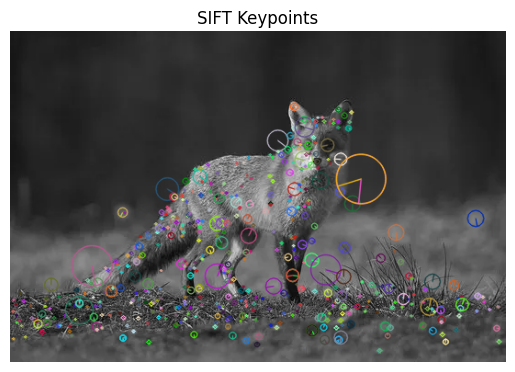

In [ ]:
img = cv2.imread('fox.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

img_sift = cv2.drawKeypoints(gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_sift)
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()


In [ ]:
img1 = cv2.imread('dog.jpg', 0)
img2 = cv2.imread('fox.jpg', 0)

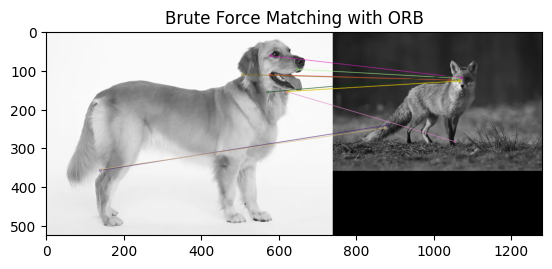

In [ ]:
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)

matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img_matches)
plt.title('Brute Force Matching with ORB')
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 0.1256 - val_loss: 0.1140
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1117 - val_loss: 0.1140
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1122 - val_loss: 0.1140
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1116 - val_loss: 0.1140
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1117 - val_loss: 0.1140
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
Image 1 PSNR: 11.22 dB
Image 2 PSNR: 9.07 dB
Im

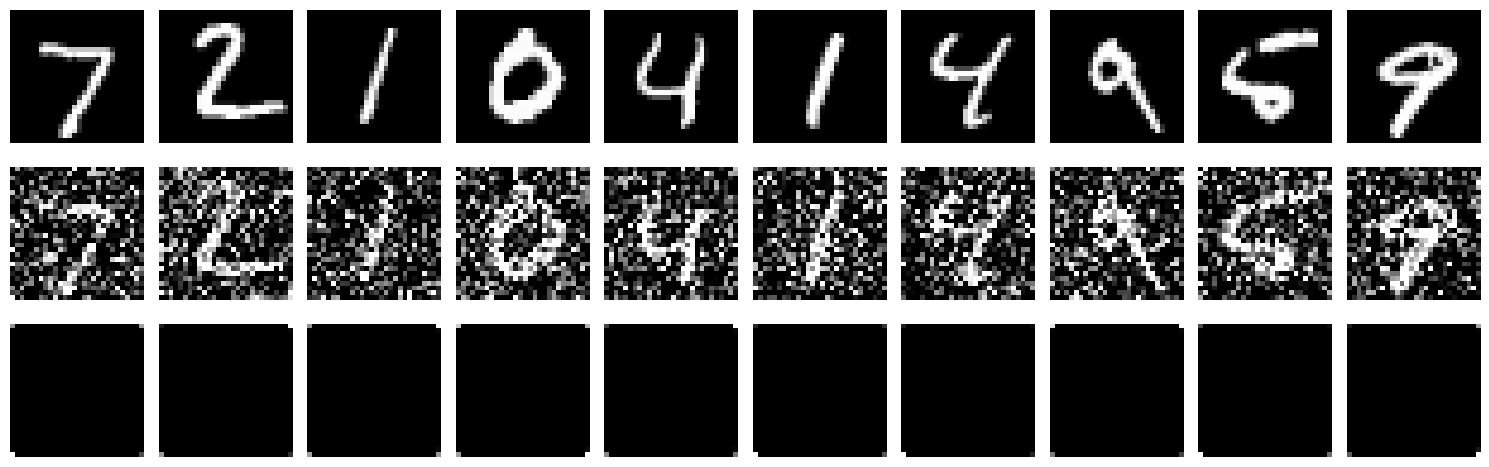

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from skimage.metrics import peak_signal_noise_ratio as psnr

(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

def add_noise(images):
    noisy = images + np.random.normal(loc=0.0, scale=0.5, size=images.shape)
    noisy = np.clip(noisy, 0., 1.)
    return noisy

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

def build_autoencoder():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), padding='same'),
        layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), padding='same'),

        layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),
        layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
    ])
    return model

autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

restored_images = autoencoder.predict(x_test_noisy[:10])

for i in range(10):
    score = psnr(x_test[i], restored_images[i])
    print(f"Image {i+1} PSNR: {score:.2f} dB")

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(3, 10, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.axis('off')
    if i == 0: plt.ylabel("Original")

    plt.subplot(3, 10, i + 11)
    plt.imshow(x_test_noisy[i].squeeze(), cmap='gray')
    plt.axis('off')
    if i == 0: plt.ylabel("Noisy")

    plt.subplot(3, 10, i + 21)
    plt.imshow(restored_images[i].squeeze(), cmap='gray')
    plt.axis('off')
    if i == 0: plt.ylabel("Restored")

plt.tight_layout()
plt.show()